In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000, #datapoints
               centers=3, #clusters
               n_features=2) #columns

In [4]:
X

array([[-8.12460335,  4.40835589],
       [-6.78303881, -3.54724099],
       [-6.54445759, -4.15670541],
       ...,
       [-9.97434751,  3.68861607],
       [-7.8271985 ,  2.23822379],
       [-9.55284305,  3.44358731]], shape=(1000, 2))

In [5]:
y

array([0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2,
       1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2,
       0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1,
       0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2,
       1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2,

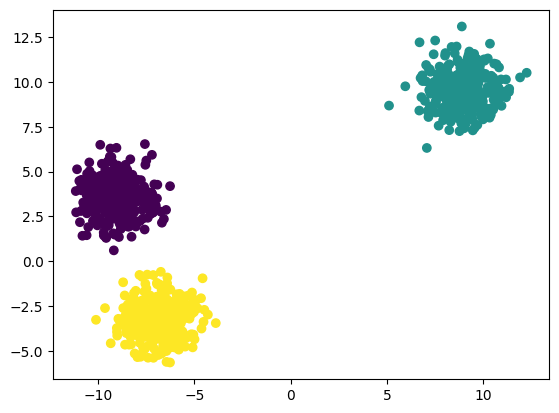

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
#Stndarsization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
#split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
#Elbow method to select k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++') #k-means++ means centroid fiurther from eadch other
    kmeans.fit(X_test_scaled)
    wcss.append(kmeans.inertia_)
#inertia_ = WCSS = how tight the clusters are.
# This number is saved inside wcss.

In [12]:
wcss #kmeans.inertia_ = the WCSS value of that model.
#sharp drop in wcss means good within cluster sum of squares

[626.7290755997742,
 116.53314105519955,
 17.981127642433705,
 15.418000528118071,
 12.230232766469193,
 9.663357101737684,
 8.98533764746061,
 7.812998311731363,
 6.892081620328244,
 6.572929684928648]

Text(0, 0.5, 'WCSS')

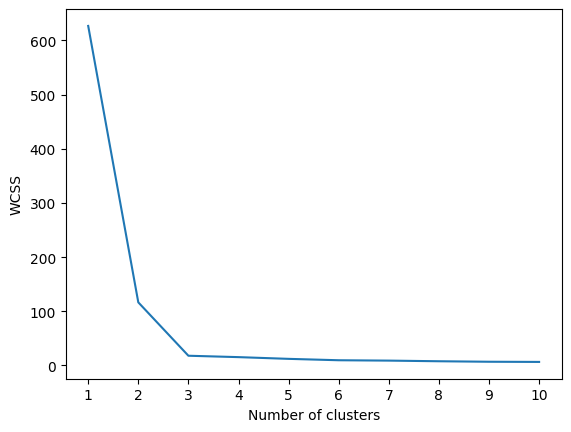

In [13]:
#plot elbow curvbe
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [14]:
kmeans=KMeans(n_clusters=k,init='k-means++') #k-means++ means centroid fiurther from eadch other
kmeans.fit(X_train_scaled)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [15]:
y_pred=kmeans.predict(X_test_scaled)

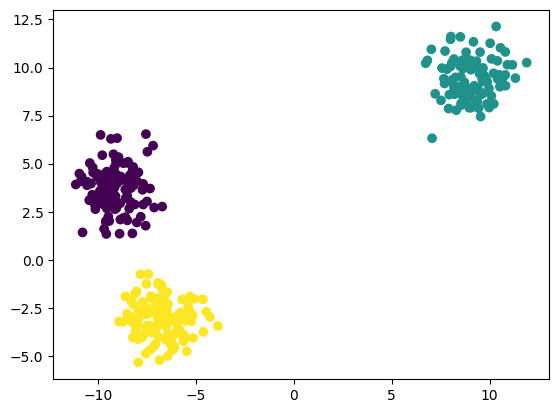

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

Imagine you want to group students into clusters.

Try different groups:

1 group → everyone together → big mess → high WCSS

2 groups → better

3 groups → even better

4 groups → improvement becomes smaller

After 5 groups → no big improvement

Where improvement slows = best k.

## Sometimes its difficult to see the elbow curve so we use
#### Validating the K value
#### Knee Location
#### Silhoutte Clustering

In [17]:
# Knee location
%pip install kneed 

Note: you may need to restart the kernel to use updated packages.


In [18]:
from kneed import KneeLocator
KL=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [19]:
KL.elbow

np.int64(3)

In [21]:
#Silhoutte Clustering
from sklearn.metrics import silhouette_score
silhouette_coefficient=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
score=silhouette_score(X_train_scaled,kmeans.labels_)
silhouette_coefficient.append(score)

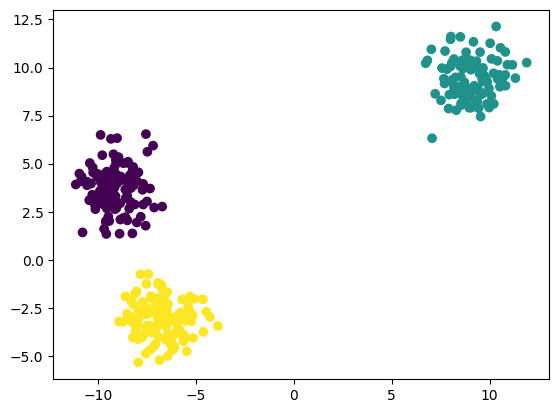

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

Text(0, 0.5, 'WCSS')

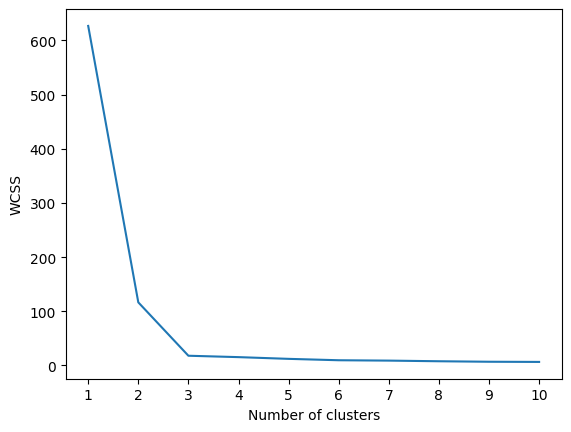

In [23]:
#plot elbow curve after silhouette clustering
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')